# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 Based on the evidence below there is a positive correlation between the weight of the mouse and average tumor volume. The drug regimens, Capomulin and Ramicane were tested in about the same amount of mice, providing a great comparable in their data for these two drugs, which happened to be the most effective on reducing the tumor. I was surprised by the mean being higher in Ketapril than the Placebo, I was expecting the Placebo to be higher. The ratio of male to female mice is very close to equal, there was 2% more males.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st 
import numpy as np
from scipy.stats import linregress

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv" 
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
mouse_results_df= pd.merge(study_results,mouse_metadata, how = "left", on= "Mouse ID")

In [2]:

# Display the data table for preview
mouse_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
total_mice=len(mouse_results_df["Mouse ID"].unique())

total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id=mouse_results_df.loc[mouse_results_df.duplicated(subset= ["Mouse ID","Timepoint"]),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_results_df[mouse_results_df["Mouse ID"].isin(dup_id)== False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
means=clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
medians=clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
variances=clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
standard_dev=clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sems=clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df=pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume":medians,
    "Tumor Volume Variance":variances,
    "Tumor Volume Std. Dev.": standard_dev,
    "Tumor Volume Std. Err.": sems
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_results_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

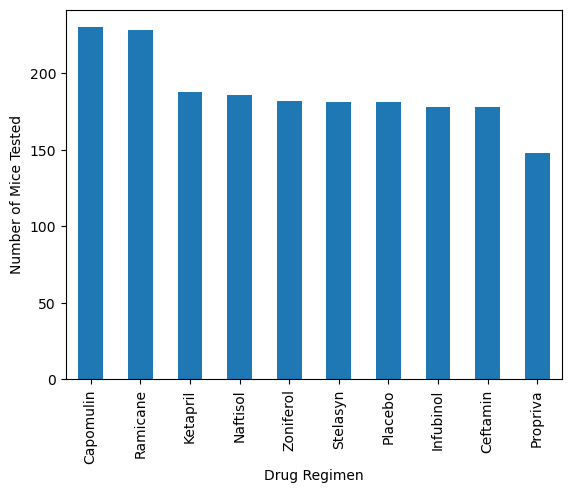

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


num_timepoints=clean_df["Drug Regimen"].value_counts()
num_timepoints.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

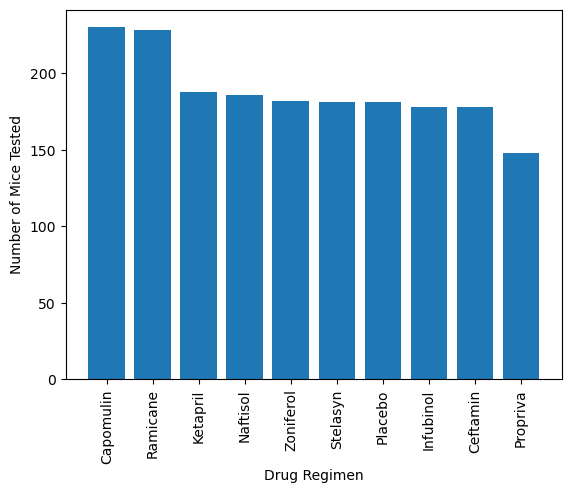

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(num_timepoints.index, num_timepoints.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

Text(0.5, 1.0, 'Mouse Total by Gender')

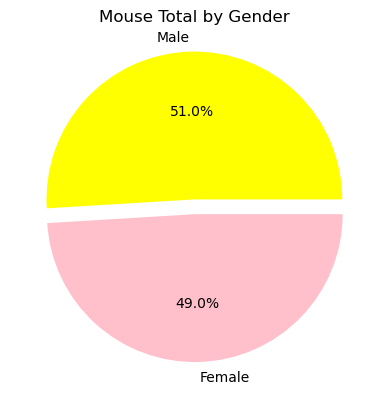

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice =clean_df.loc[:,["Sex"]]
labels=["Male","Female"]
gender=gender_mice["Sex"].value_counts()
colors=["yellow","pink"]
explode=[0.1,0]

mice_gender_count=plt.pie(gender, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Mouse Total by Gender")

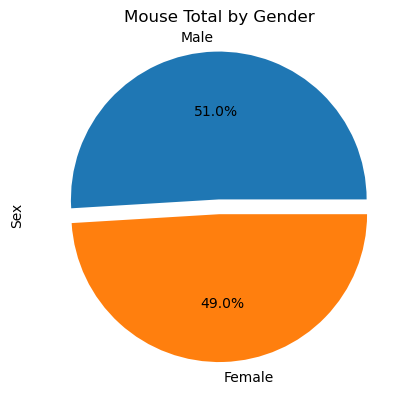

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_mice_pie=gender.plot(kind='pie',title="Mouse Total by Gender", explode=explode,autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_group=clean_df.groupby("Mouse ID")
max_timepoint= mouse_group["Timepoint"].max()
max_timepoint=max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_vol=max_timepoint.merge(clean_df, on=["Mouse ID","Timepoint"], how="left")
max_timepoint_vol




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

drugs_regimens=["Capomulin","Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in drugs_regimens:
    
    tumor_per_drug = max_timepoint_vol.loc[max_timepoint_vol["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_vol.append(tumor_per_drug)
    quartiles= tumor_per_drug.quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq= quartiles[0.75]
    iqr= upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_per_drug.loc[(tumor_per_drug < lower_bound) | (tumor_per_drug > upper_bound)]
    print(f"{x} outlier is {outlier}")

    

Capomulin outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlier is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)


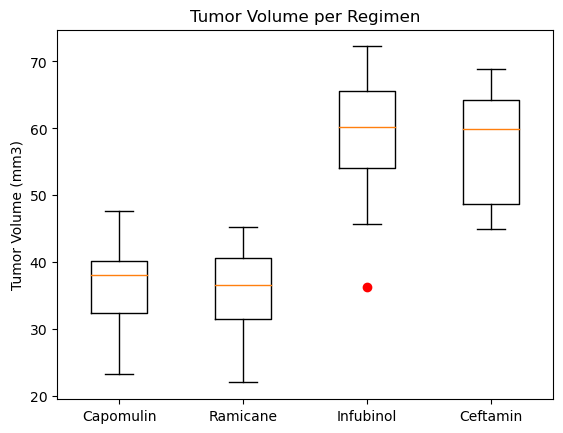

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=drugs_regimens, sym="r")
plt.show()

## Line and Scatter Plots

In [19]:
capomulin= clean_df.loc[clean_df["Drug Regimen"]== 'Capomulin']
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


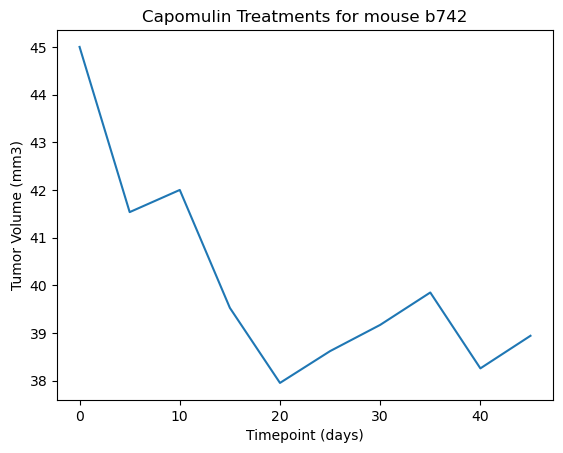

In [20]:
#generate a line plot of a tumor volume vs. time point for a mouse treated with Capomulin
b742 = capomulin.loc[capomulin['Mouse ID']== 'b742']
b742

plt.plot(b742['Timepoint'], b742['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatments for mouse b742')
plt.show()

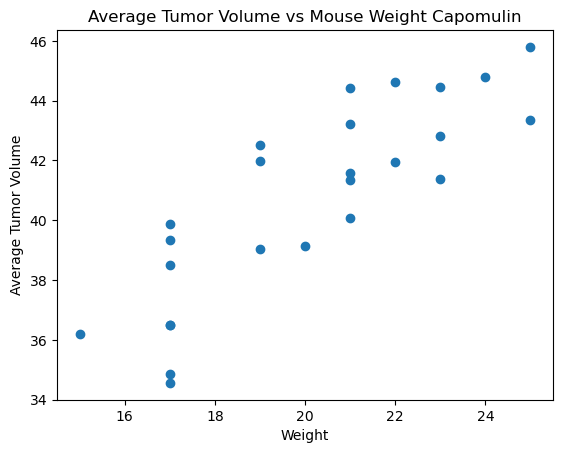

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_tumor = capomulin.groupby(['Mouse ID']).mean()

plt.scatter(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs Mouse Weight Capomulin')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()


## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is (0.8419363424694718, 2)


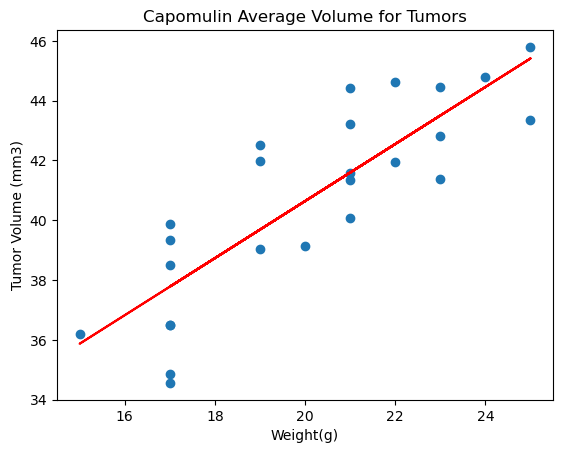

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = (st.pearsonr(average_tumor['Weight (g)'], average_tumor['Tumor Volume (mm3)'])[0],2)
print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {correlation}')

#linear regression
x_value= average_tumor['Weight (g)']
y_value= average_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_value=x_value*slope + intercept
line_eq='y =' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.title('Capomulin Average Volume for Tumors')
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_value, regress_value, 'r-')